Packages to install

In [ ]:
pip install pandas scikit-learn networkx matplotlib

Step 1: Read the CSV

In [ ]:
import io
import pandas as pd
from google.colab import files
file=files.upload()

# Extract the file content from the dictionary
file_content = list(file.values())[0]

df=pd.read_csv(io.BytesIO(file_content))
df

Saving datafood.csv to datafood (2).csv


,Dish,Place,IsVeg,TypeOfDish
0,Butter Chicken,North,No,Main
1,Idli,South,Yes,Main
2,Raita,North,Yes,Side
3,Fish Curry,South,No,Main
4,Papad,West,Yes,Side
5,Rajma,North,Yes,Main
6,Egg Bhurji,East,No,Side
7,Biryani,East,No,Main
8,Polau,East,Yes,Main
9,Chicken Bharta,North,No,Side


Step 2: Convert to Transactional Format

In [ ]:
transactions = []
#itterows() gives index of each row and row
for _, row in df.iterrows():
    # Make a row by converting the row from df to list
    transaction = [f"{col}={row[col]}" for col in df.columns]
    transactions.append(transaction)
transactions

[['Dish=Butter Chicken', 'Place=North', 'IsVeg=No', 'TypeOfDish=Main'],
 ['Dish=Idli', 'Place=South', 'IsVeg=Yes', 'TypeOfDish=Main'],
 ['Dish=Raita', 'Place=North', 'IsVeg=Yes', 'TypeOfDish=Side'],
 ['Dish=Fish Curry', 'Place=South', 'IsVeg=No', 'TypeOfDish=Main'],
 ['Dish=Papad', 'Place=West', 'IsVeg=Yes', 'TypeOfDish=Side'],
 ['Dish=Rajma', 'Place=North', 'IsVeg=Yes', 'TypeOfDish=Main'],
 ['Dish=Egg Bhurji', 'Place=East', 'IsVeg=No', 'TypeOfDish=Side'],
 ['Dish=Biryani', 'Place=East', 'IsVeg=No', 'TypeOfDish=Main'],
 ['Dish=Polau', 'Place=East', 'IsVeg=Yes', 'TypeOfDish=Main'],
 ['Dish=Chicken Bharta', 'Place=North', 'IsVeg=No', 'TypeOfDish=Side'],
 ['Dish=Dosa', 'Place=South', 'IsVeg=Yes', 'TypeOfDish=Main']]

Step 3: Assign Codes and Create Binary Dataset

In [ ]:
# Assign numbers to attribute-value pairs
all_items = sorted({item for transaction in transactions for item in transaction})
item_to_code = {item: idx + 1 for idx, item in enumerate(all_items)}
code_to_item = {v: k for k, v in item_to_code.items()}

# Convert transactions to code format
coded_transactions = [[item_to_code[item] for item in transaction] for transaction in transactions]

# Create binary dataset manually
binary_dataset = []
for transaction in transactions:
    # Create a row of zeros with the length of all unique items
    binary_row = [0] * len(all_items)
    # Set the corresponding position to 1 if the item is in the transaction
    for item in transaction:
        binary_row[all_items.index(item)] = 1
    binary_dataset.append(binary_row)

binary_dataset

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0]]

Download binary_dataset

In [ ]:
import pandas as pd

# Convert the binary_dataset list to a pandas DataFrame
binary_df = pd.DataFrame(binary_dataset)

# Save the DataFrame to a CSV file
binary_df.to_csv('binary_dataset.csv', index=False)

from google.colab import files
files.download('binary_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 4: Create a Graph Based on Similarity

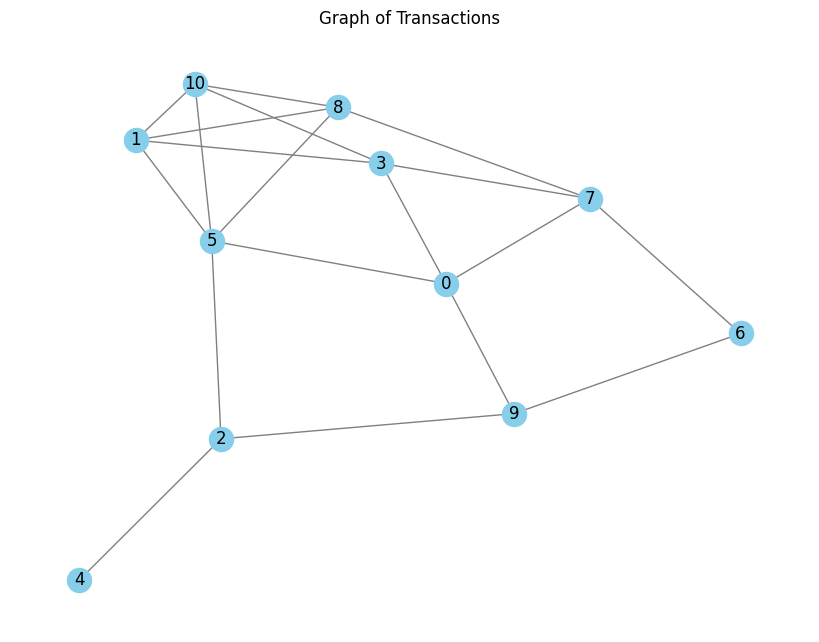

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()

# Add nodes (each transaction)
for i in range(len(binary_dataset)):
    G.add_node(i)

# Add edges based on shared attribute-value pairs (at least 1 common feature)
for i in range(len(binary_dataset)):
    for j in range(i + 1, len(binary_dataset)):
        # Similarity = number of shared attributes
        similarity = np.sum(np.logical_and(binary_dataset[i], binary_dataset[j]))
        if similarity >= 2:
            G.add_edge(i, j, weight=1)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
# # Draw edge labels (weights)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graph of Transactions")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the current figure to a file
plt.savefig('graph.png')
files.download('graph.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

Step 5: Shortest Path on the Graph

Enter the STARING NODE 4
Enter the ENDING NODE 3
Dijkstra's Shortest Path: [4, 2, 5, 0, 3]


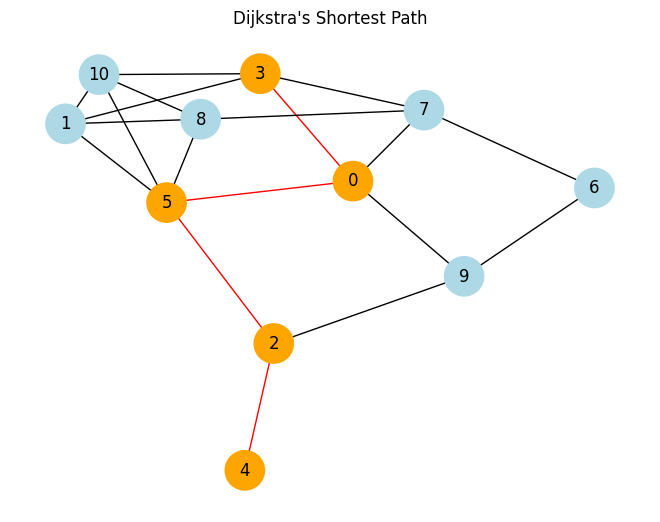

In [ ]:
start_node = int(input("Enter the STARING NODE "))
end_node = int(input("Enter the ENDING NODE "))
djikstra()

In [ ]:
def djikstra():  # Dijkstra's Algorithm (weighted shortest path)
  try:
      path = nx.dijkstra_path(G, source=start_node, target=end_node)
      print("Dijkstra's Shortest Path:", path)
  except nx.NetworkXNoPath:
      print("No path found using Dijkstra's algorithm.")


  # Visualize
  pos = nx.spring_layout(G)
  edge_colors = ['red' if (u, v) in zip(path, path[1:]) or (v, u) in zip(path, path[1:]) else 'black' for u, v in G.edges()]
  node_colors = ['orange' if n in path else 'lightblue' for n in G.nodes()]
  nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color=node_colors, node_size=800)
  plt.title("Dijkstra's Shortest Path")
  plt.show()


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Save the current figure to a file
plt.savefig('graph.png')
files.download('graph.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>